In [72]:
import cv2
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import imutils
import easyocr

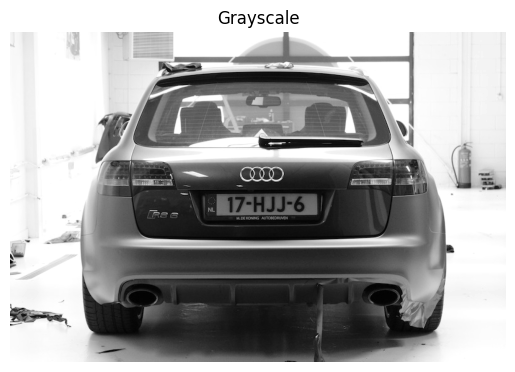

In [111]:
img = cv2.imread("data/image1.png")
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap='gray')
plt.title("Grayscale")
plt.axis('off')
plt.show()

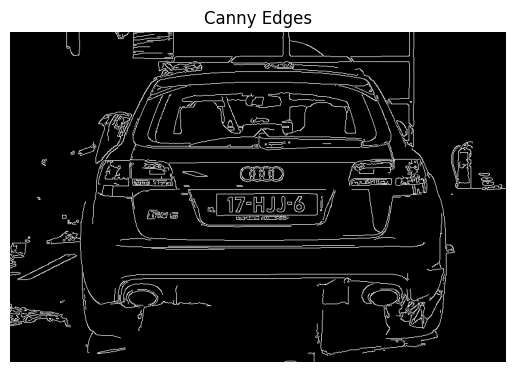

In [112]:
bfilter = cv2.bilateralFilter(gray, 11, 17, 17) #Noise reduction and smoothening the edges becasue we want to get roi of plate
edged = cv2.Canny(bfilter, 30, 200) #Edge detection
plt.imshow(edged, cmap='gray')
plt.title("Canny Edges")
plt.axis('off')
plt.show()

In [113]:
# cv2.findContours returns (image, contours, hierarchy) or (contours, hierarchy) based on OpenCV version
keypoints = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
# imutils.grab_contours extracts only the contours from the result of cv2.findContours
contourss = imutils.grab_contours(keypoints)# this function is used to grab the contours from the image

contours = sorted(contourss, key=cv2.contourArea, reverse=True)[:10]
# print(contours)
len(contours)

10

In [114]:
location = None
for contour in contours:
    approx = cv2.approxPolyDP(contour, 10, True)# Approximates the contour shape; epsilon=10 controls the approximation accuracy 
    if len(approx) == 4:
        location = approx
        break
len(location)   

4

In [115]:
location

array([[[333, 262]],

       [[334, 297]],

       [[495, 295]],

       [[494, 262]]], dtype=int32)

In [116]:
approx[1][0][0]

334

In [ ]:
mask = np.zeros(gray.shape, np.uint8)
new_image = cv2.drawContours(mask, [location], -1,255, -1)# the last parameter is thickness as -1 means fill the contour
new_image = cv2.bitwise_and(img, img, mask=mask)

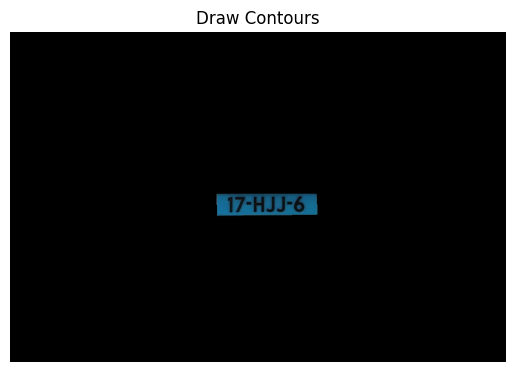

In [118]:
plt.imshow(new_image, cmap='gray')
plt.title("Draw Contours")
plt.axis('off')
plt.show()

In [119]:
(x,y) = np.where(mask==255)
(x1, y1) = (np.min(x), np.min(y))
(x2, y2) = (np.max(x), np.max(y))
cropped_image = gray[x1:x2+1, y1:y2+1]

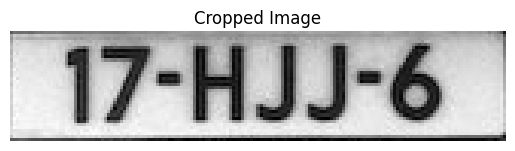

In [120]:
plt.imshow(cropped_image, cmap='gray')
plt.title("Cropped Image")
plt.axis('off')
plt.show()

In [121]:
reader = easyocr.Reader(['en'])
result = reader.readtext(cropped_image)
result

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


[([[13, 1], [149, 1], [149, 36], [13, 36]], '17-HJJ-6', 0.974693765646999)]

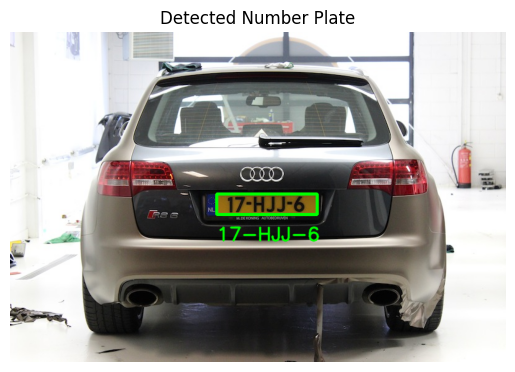

In [122]:
text = result[0][-2]
font = cv2.FONT_HERSHEY_SIMPLEX
res = cv2.putText(img, text=text, org=(approx[0][0][0], approx[1][0][1]+40), fontFace=font, fontScale=1, color=(0,255,0), thickness=2, lineType=cv2.LINE_AA)
res = cv2.rectangle(img, tuple(approx[0][0]), tuple(approx[2][0]), (0,255,0),3)
plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))
plt.title("Detected Number Plate")
plt.axis('off')
plt.show()